In [13]:
import os
import pandas as pd
import json

from matplotlib import pyplot as plt

In [21]:
data = {}
PREFIX = "records_"
SUFFIX = ".json"
DIR = "./data"
for entry in os.listdir(DIR):
    filepath = os.path.join(DIR, entry)
    if os.path.isfile(filepath):
        model_name = entry[len(PREFIX):-len(SUFFIX)]
        with open(filepath) as f:
            data[model_name] = json.load(f)

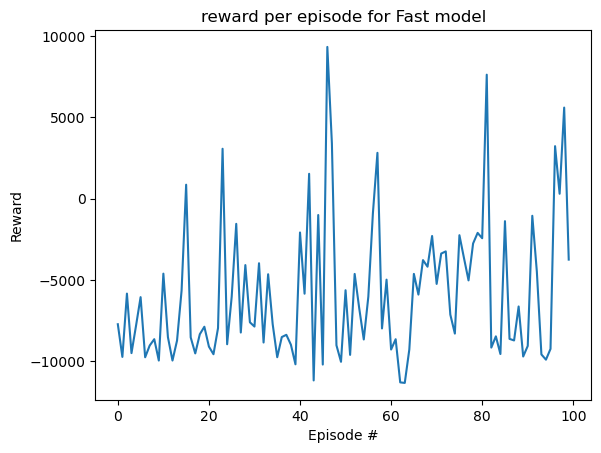

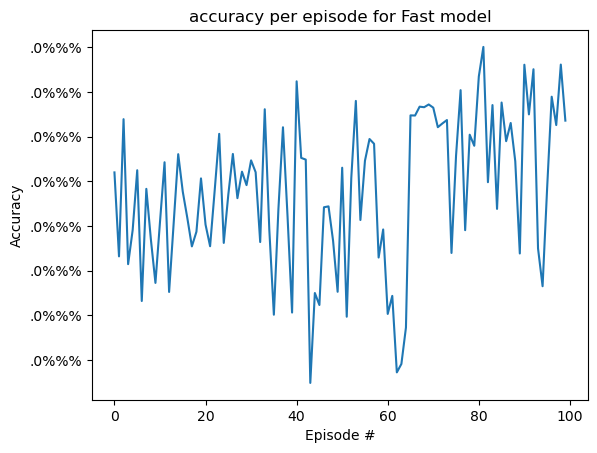

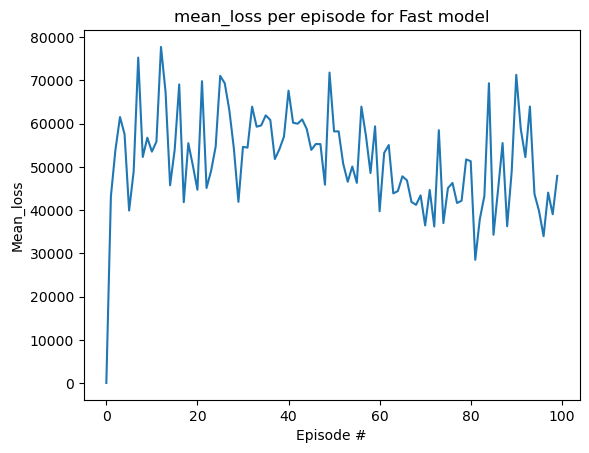

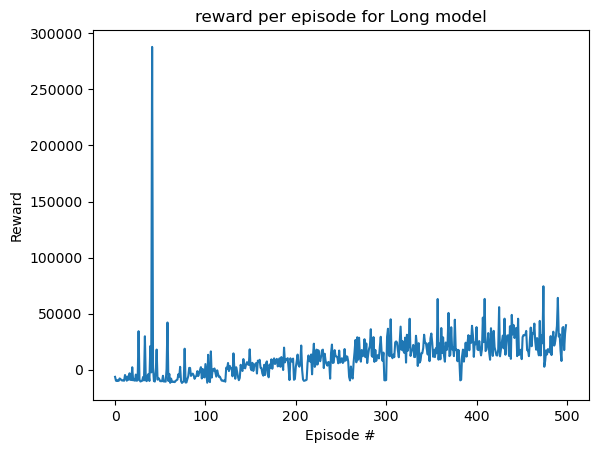

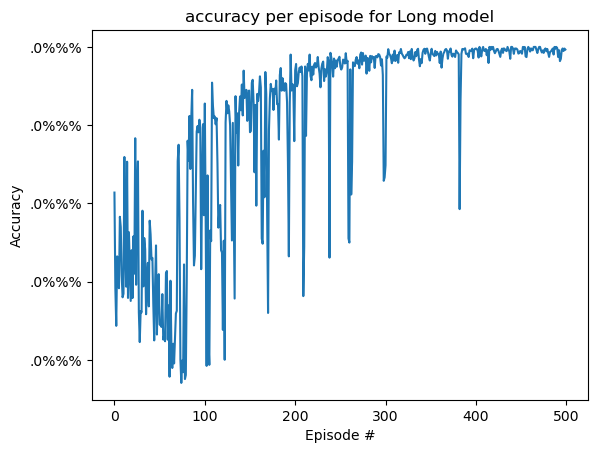

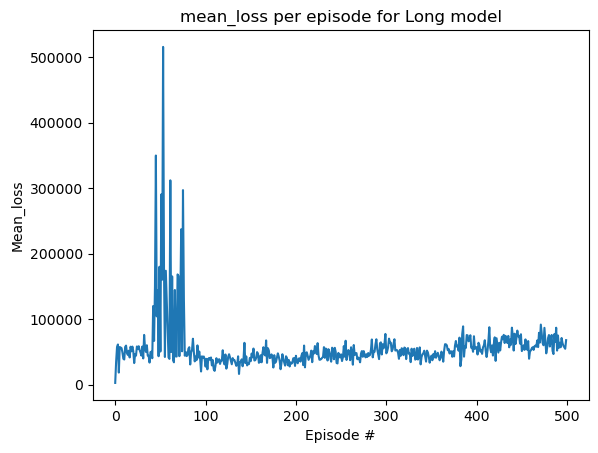

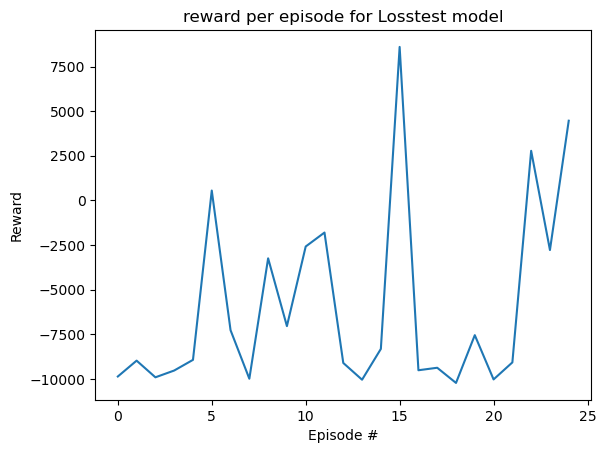

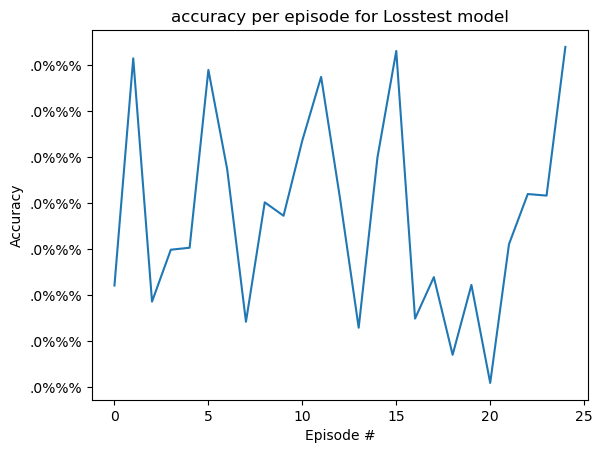

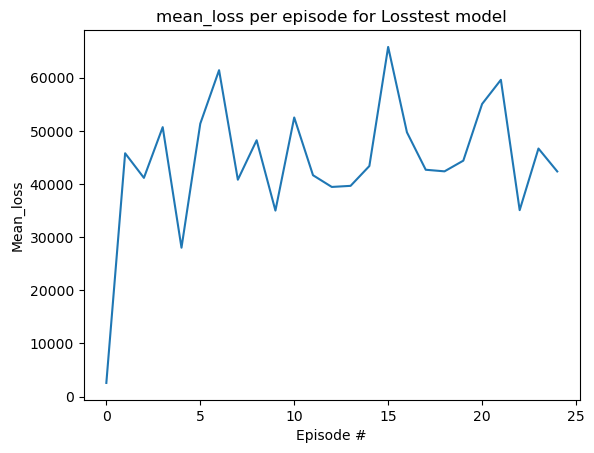

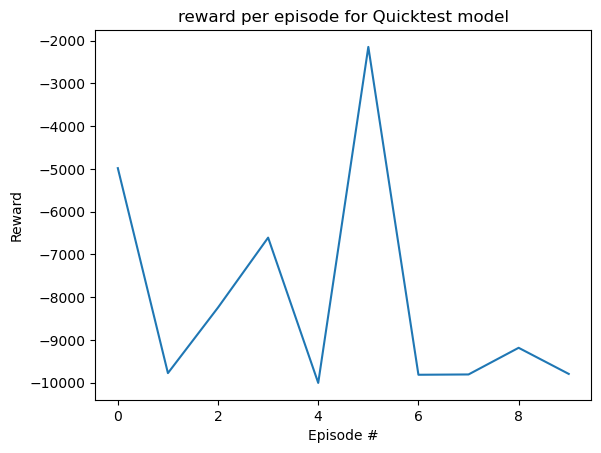

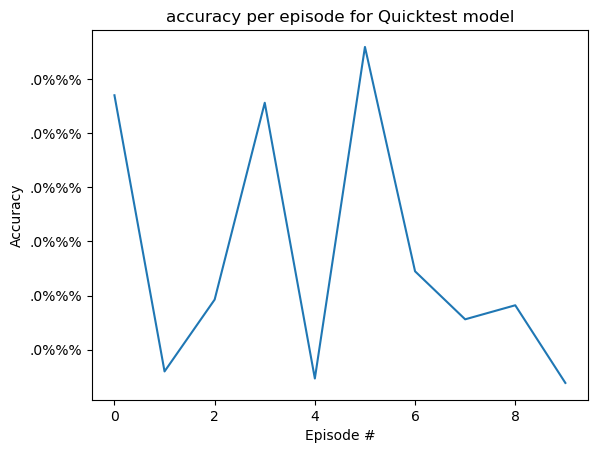

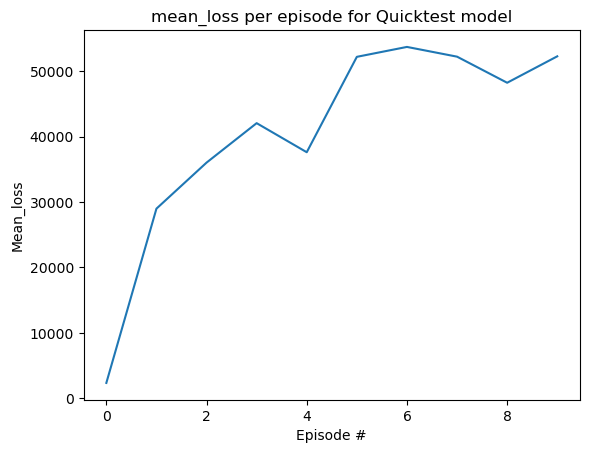

In [23]:
FEATURES = ["reward","accuracy","mean_loss"]
for name, results in data.items():
    df = pd.DataFrame(results)
    for feature in FEATURES:
        fig, ax = plt.subplots()
        ax.plot(df[feature])
        ax.set_title(f"{feature} per episode for {name} model")
        ax.set_xlabel("Episode #")
        ax.set_ylabel(feature.capitalize())
        if feature == "accuracy":
            ax.get_yaxis().set_major_formatter("{x:.0%}")
        fig.savefig(f"./graphs/{name}_{feature}")
        